In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [199]:
dates_seconds = pd.date_range(start='20160101', end='20170101', freq='S')

In [200]:
blocks = pd.DataFrame(index=dates_seconds)
blocks.head()

""
2016-01-01 00:00:00
2016-01-01 00:00:01
2016-01-01 00:00:02
2016-01-01 00:00:03
2016-01-01 00:00:04


In [201]:
blocks['Blocks found'] = np.random.poisson(lam=1/600, size=len(blocks))
blocks.head()

,Blocks found
2016-01-01 00:00:00,0
2016-01-01 00:00:01,0
2016-01-01 00:00:02,0
2016-01-01 00:00:03,0
2016-01-01 00:00:04,0


In [202]:
set_blocks = set(blocks['Blocks found'])

In [203]:
set_blocks

{0, 1, 2}

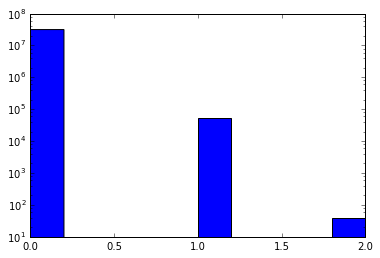

In [204]:
plt.hist(blocks['Blocks found'], log=True);

In [205]:
blocks = blocks[blocks['Blocks found'] != 0]
print(len(blocks))
print()
print(blocks.head())

53030

                     Blocks found
2016-01-01 00:12:39             1
2016-01-01 00:18:09             1
2016-01-01 00:56:47             1
2016-01-01 00:59:49             1
2016-01-01 01:36:03             1


In [206]:
blocks.head()

,Blocks found
2016-01-01 00:12:39,1
2016-01-01 00:18:09,1
2016-01-01 00:56:47,1
2016-01-01 00:59:49,1
2016-01-01 01:36:03,1


In [207]:
blocks['Time'] = blocks.index

blocks['dTime'] = ((blocks['Time'] - blocks['Time'].shift())).\
                    fillna(blocks['Time'][0] - pd.to_datetime('20160101'))

In [208]:
blocks.head()

,Blocks found,Time,dTime
2016-01-01 00:12:39,1,2016-01-01 00:12:39,00:12:39
2016-01-01 00:18:09,1,2016-01-01 00:18:09,00:05:30
2016-01-01 00:56:47,1,2016-01-01 00:56:47,00:38:38
2016-01-01 00:59:49,1,2016-01-01 00:59:49,00:03:02
2016-01-01 01:36:03,1,2016-01-01 01:36:03,00:36:14


In [209]:
blocks['Seconds between blocks'] = (blocks['dTime'] / np.timedelta64(1, 's')).astype(int)
blocks.head()

,Blocks found,Time,dTime,Seconds between blocks
2016-01-01 00:12:39,1,2016-01-01 00:12:39,00:12:39,759
2016-01-01 00:18:09,1,2016-01-01 00:18:09,00:05:30,330
2016-01-01 00:56:47,1,2016-01-01 00:56:47,00:38:38,2318
2016-01-01 00:59:49,1,2016-01-01 00:59:49,00:03:02,182
2016-01-01 01:36:03,1,2016-01-01 01:36:03,00:36:14,2174


In [210]:
blocks['Minutes between blocks'] = blocks['Seconds between blocks'] / 60
blocks.head()

,Blocks found,Time,dTime,Seconds between blocks,Minutes between blocks
2016-01-01 00:12:39,1,2016-01-01 00:12:39,00:12:39,759,12.650000
2016-01-01 00:18:09,1,2016-01-01 00:18:09,00:05:30,330,5.500000
2016-01-01 00:56:47,1,2016-01-01 00:56:47,00:38:38,2318,38.633333
2016-01-01 00:59:49,1,2016-01-01 00:59:49,00:03:02,182,3.033333
2016-01-01 01:36:03,1,2016-01-01 01:36:03,00:36:14,2174,36.233333


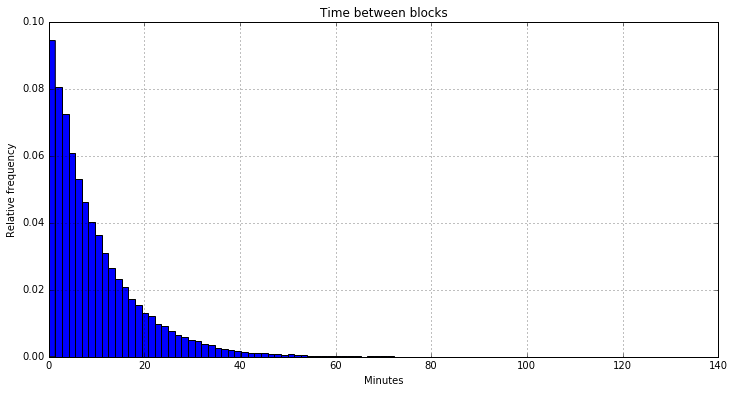

In [217]:
plt.figure(figsize=(12, 6))
plt.hist(blocks['Minutes between blocks'], bins=100, normed=True)
plt.title('Time between blocks')
plt.xlabel('Minutes')
plt.ylabel('Relative frequency')
plt.grid()
plt.show()